# Exercício Programa 2 - MAC0209 - Modelagem e Simulação 
## Grupo: Eduardo Nascimento, Gabriel Massukado, Larissa Goto, Nathalia Borin, Matheus Lima

## Introdução


## Método


### Verificação do programa


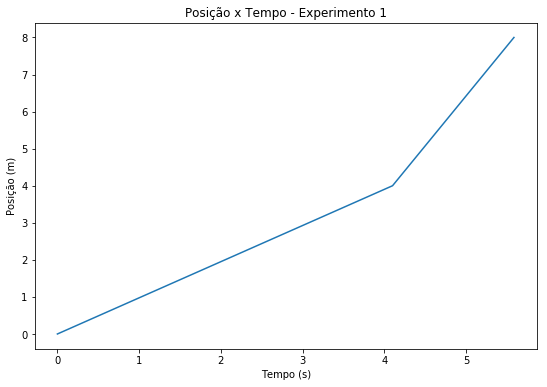

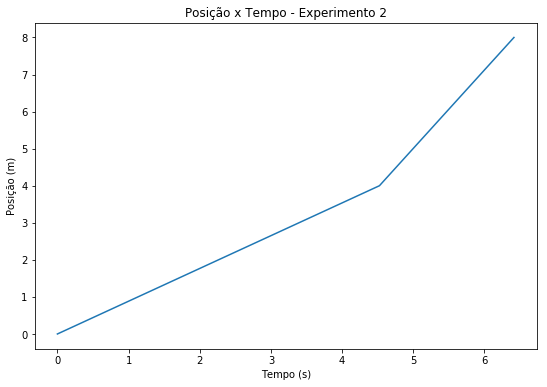

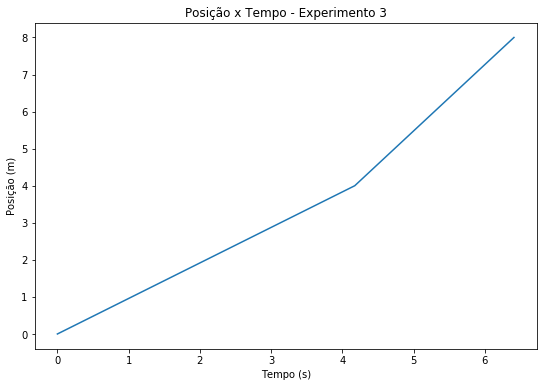

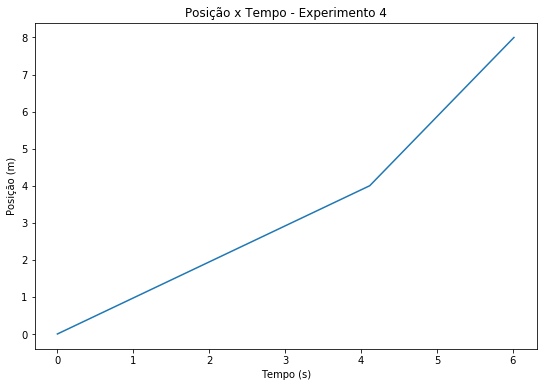

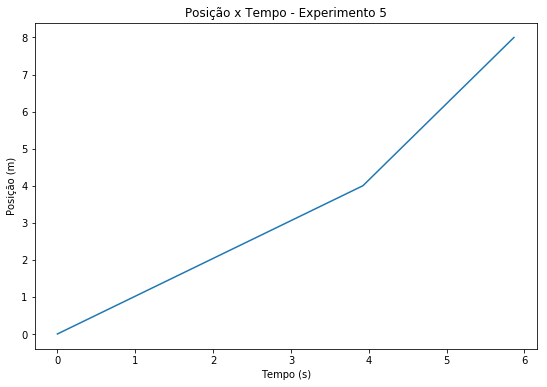

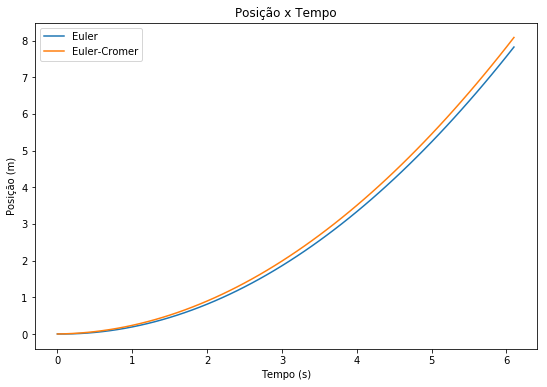

Diferença entre os algoritmos: 0.265m


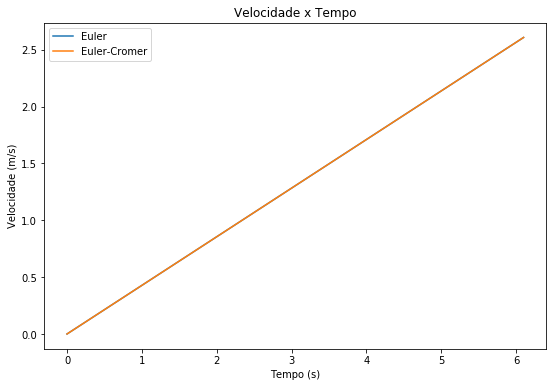

Diferença entre os algoritmos: 0.000m/s


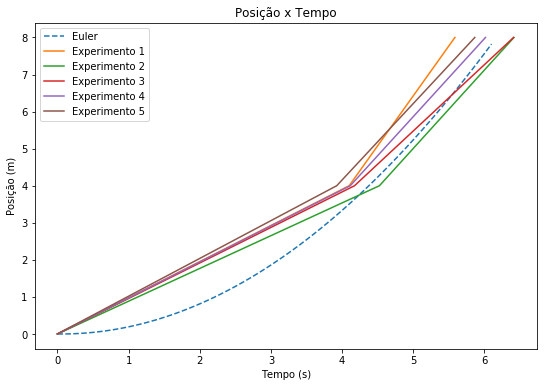

Tempo médio para percorrer 8m experimental: 6.058s
Tempo médio simulado: 6.200s
Erro médio: 0.142s


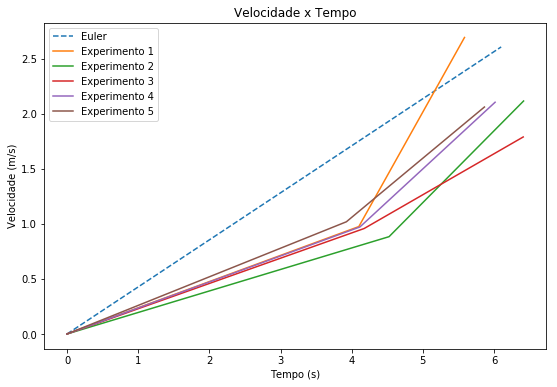

Velocidade média experimental: 1.324m/s
Velocidade média simulada: 1.304m/s
Erro médio: 0.021s


In [78]:
import math
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib.pyplot as pyplot
import pandas as pd

#Inicializa o vetor de estados
#S = [posição, velocidade, aceleração, tempo]
def initState(x,v,a,t):
    S = [x,v,a,t]
    return(S)

#Calcula o próximo estado pelo algoritmo de Euler
# y = y + v*dt
# v = v + a*dt
# a é constante (g)
# t = t + dt
def nextState(S,dt):
    S[0] = S[0] + S[1]*dt
    S[1] = S[1] + S[2]*dt
    S[3] = S[3] + dt
    return(S)

#Calcula o próximo estado pelo algoritmo de Euler-Cromer
# v = v + a*dt
# y = y + v*dt
# a é constante (g)
# t = t + dt
def nextStateCromer(S,dt):
    S[1] = S[1] + S[2]*dt
    S[0] = S[0] + S[1]*dt
    S[3] = S[3] + dt
    return(S)

def rampa():
    
    #Lê e organiza os dados
    data = pd.read_csv('skate_tempos.csv', sep=';', decimal='.')    
    data = data.as_matrix().transpose()
        
    txe = [] #tempos para cruzar 4m e 8m para cada experimento
    vxe = [] #velocidades médias nos intervalos [0,4] e [4,8] para cada experimento
    tme = 0.0 #tempo médio exmperimental (para descer a rampa de 8m)
    vme = 0.0 #velocidade média experimental
    counter = 1
    i = 1
    
    #Plota gráfico de posição x tempo para cada experimento
    while i < 11:
        pyplot.figure()
        pyplot.xlabel("Tempo (s)")
        pyplot.ylabel("Posição (m)")
        pyplot.title("Posição x Tempo - Experimento {}".format(counter))
        t4 = (data[i][0] + data[i+1][0])/2
        t8 = (data[i][1] + data[i+1][1])/2
        v4 = 4/t4
        v8 = 4/(t8-t4)
        txe.append([0,t4,t8])
        vxe.append([0,v4,v8])
        vme += 8/t8
        tme += t8
        pyplot.plot([0,t4,t8],[0,4,8])
        pyplot.show()
        counter+=1
        i+=2
        
    #Médias    
    vme = vme/5
    tme = tme/5
    
    #Simula os experimentos utilizando algoritmo de Euler para sistemas dinâmicos
    
    theta = 2.5*math.pi/180 #ângulo de inclinação da rampa: 2.5°
    g = 9.8 #aceleração da gravidade
    x = 0.0 #onde 0 é o inicio da rampa e 8 o final
    v = 0.0 #sai do repouso
    a = g*math.sin(theta) #rampa
    t = 0.0 #tempo inicial
    dt = 0.1
    
    S = initState(x,v,a,t)
    Sc = initState(x,v,a,t)
    
    xs = [] #posição simulada por Euler
    vs = [] #velocidade simulada por Euler
    xsc = [] #posição simulada por Euler-Cromer
    vsc = [] #velocidade simulada por Euler-Cromer
    tempo = []
    
    #Faz a simulação até atingir 8m
    while abs(S[0] - 8) > 0.1 or S[0] <= 8:
        xs.append(S[0])
        vs.append(S[1])
        xsc.append(Sc[0])
        vsc.append(Sc[1])
        tempo.append(S[3])
        nextState(S, dt)
        nextStateCromer(Sc, dt)
    
    #Médias
    tms = S[3] #tempo médio simulado
    vms = S[0]/tms #velocidade média simulado
    
    #Plota o resultado das simulações
    
    pyplot.figure()
    pyplot.plot(tempo, xs, label='Euler')
    pyplot.plot(tempo, xsc, label='Euler-Cromer')
    pyplot.title("Posição x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Posição (m)")
    pyplot.legend()
    pyplot.show()
    
    print("Diferença entre os algoritmos: %.3fm" %(abs(Sc[0]-S[0])))
    
    pyplot.figure()
    pyplot.plot(tempo, vs, label='Euler')
    pyplot.plot(tempo, vsc, label='Euler-Cromer')
    pyplot.title("Velocidade x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Velocidade (m/s)")
    pyplot.legend()
    pyplot.show()
          
    print("Diferença entre os algoritmos: %.3fm/s" %(abs(Sc[1]-S[1])))
    
    #Compara observado e esperado
        
    pyplot.figure()
    pyplot.plot(tempo, xs,linestyle='--',label='Euler')
    for i in range(5):
        pyplot.plot(txe[i],[0,4,8],label='Experimento {}'.format(i+1))
    pyplot.title("Posição x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Posição (m)")
    pyplot.legend()
    pyplot.show()
    
    print("Tempo médio para percorrer 8m experimental: %.3fs" %(tme))
    print("Tempo médio simulado: %.3fs" %(tms))
    print("Erro médio: %.3fs" %(abs(tme-tms)))
        
    pyplot.figure()
    pyplot.plot(tempo, vs,linestyle='--',label='Euler')
    for i in range(5):
        pyplot.plot(txe[i],vxe[i],label='Experimento {}'.format(i+1))
    pyplot.title("Velocidade x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Velocidade (m/s)")
    pyplot.legend()
    pyplot.show()
    
    print("Velocidade média experimental: %.3fm/s" %(vme))
    print("Velocidade média simulada: %.3fm/s" %(vms))
    print("Erro médio: %.3fs" %(abs(vms-vme)))
        
rampa()

skate1


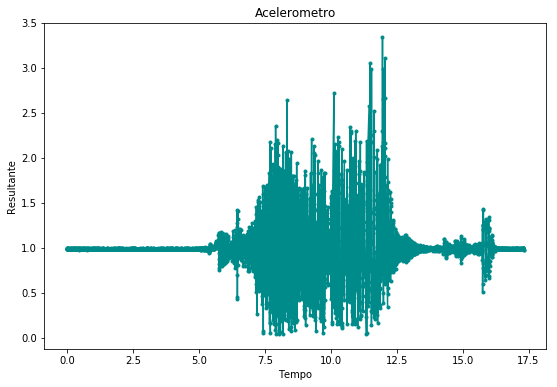

skate2


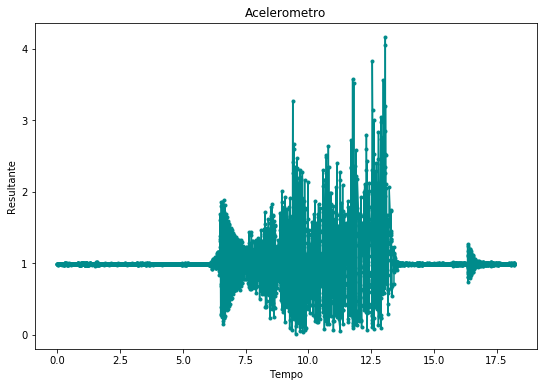

skate3


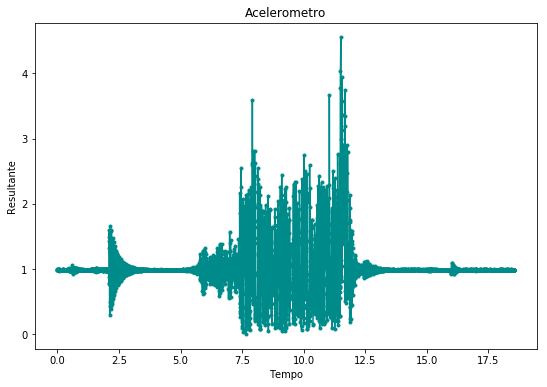

skate4


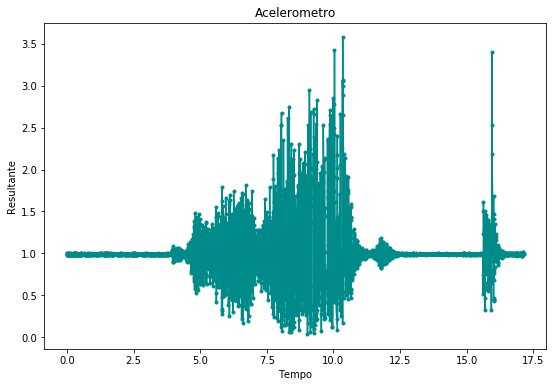

skate5


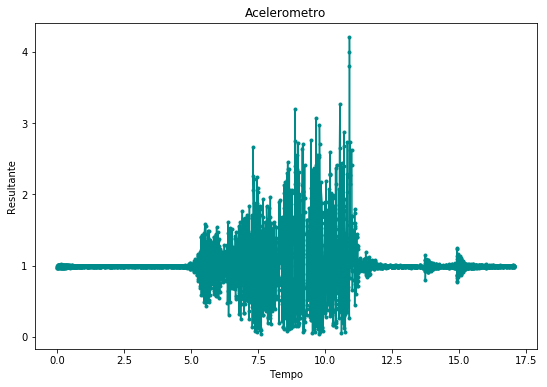

In [56]:
#Função que plota o gráfico csv do acelerômetro, além disso a função
#tenta identificar os pontos, marcados de vermelho, de início e fim 
#das travessias através das variações da força resultante. Para isso é 
#calculada uma média da força resultante a cada 500 elementos e verifica a maior diferença positiva
#(quando, teoricamente, se inicia o andar) e a maior diferença negativa
#(quando, teoricamente, a pessoa para e a resultante diminui).
#A função retorna o tempo de início da travessia para a futura sobreposição dos gráficos.
def acelerometro(filename):
        file = filename+'.csv'
        x = pd.read_csv(file, sep=';', decimal=',')
        x = x.as_matrix()
        tempos = []
        forca = []
        linhas = len(x)
        j=0
        while j<linhas:
            tempos.append(x[j][0])
            forca.append(x[j][4])
            j += 1

        pyplot.rcParams["figure.figsize"] = [9,6]
        pyplot.figure(5)
        pyplot.xlabel('Tempo')
        pyplot.ylabel('Resultante')
        pyplot.title('Acelerometro')
        pyplot.plot(tempos,forca,marker='.',color = 'darkcyan')
        pyplot.show()
        return

for i in range(1,6):    
    filename='skate{}'.format(i)
    print(filename)
    acelerometro(filename)

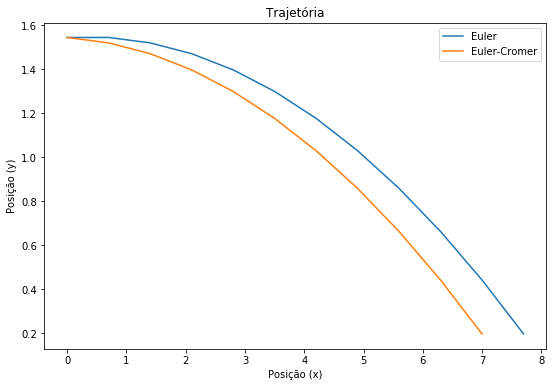

Diferença entre os algoritmos: 0.700m


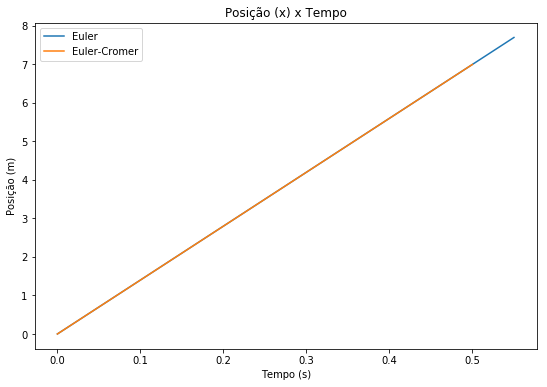

Diferença entre os algoritmos: 0.700m


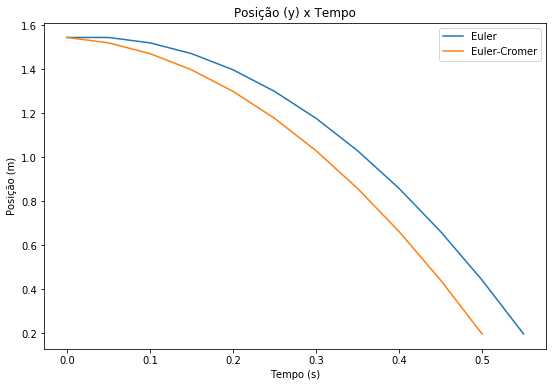

Diferença entre os algoritmos: 0.050s


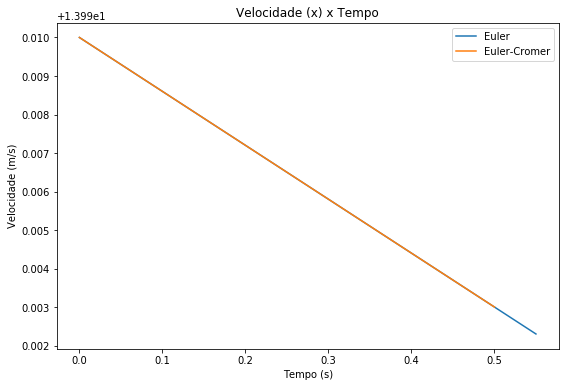

Diferença entre os algoritmos: 0.001m/s


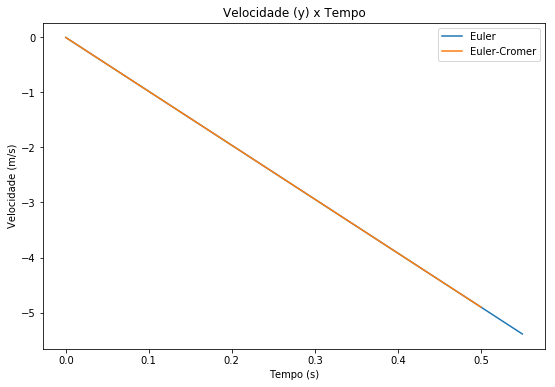

Diferença entre os algoritmos: 0.490m/s


In [77]:
#Inicializa o vetor de estados
#S = [posição(x), posição(y), velocidade(x), velocidade(y), aceleração(x), aceleração(y), tempo]
def initState(x,y,vx,vy,ax,ay,t):
    S = [x,y,vx,vy,ax,ay,t]
    return(S)

#Calcula o próximo estado pelo algoritmo de Euler
# x = x + vx*dt
# y = y + vx*dt
# vx = vx + ax*dt
# vy = vy + ay*dt
# ax = -0.0001*vx (simular resistência do ar)
# ay é constante (g)
# t = t + dt
def nextState(S,dt):
    S[0] = S[0] + S[2]*dt
    S[1] = S[1] + S[3]*dt
    S[2] = S[2] + S[4]*dt
    S[3] = S[3] + S[5]*dt
    S[4] = -0.001*S[2]
    S[6] = S[6] + dt
    return(S)

#Calcula o próximo estado pelo algoritmo de Euler
# ax = -0.0001*vx (simular resistência do ar)
# vx = vx + ax*dt
# vy = vy + ay*dt
# x = x + vx*dt
# y = y + vx*dt
# ay é constante (g)
# t = t + dt
def nextStateCromer(S,dt):
    S[4] = -0.001*S[2]
    S[2] = S[2] + S[4]*dt
    S[3] = S[3] + S[5]*dt
    S[0] = S[0] + S[2]*dt
    S[1] = S[1] + S[3]*dt
    S[6] = S[6] + dt
    return(S)

def lancamento():
    
    #Ler e organizar os dados aqui
    
    #Simula os experimentos utilizando algoritmo de Euler para sistemas dinâmicos
    g = 9.8 #aceleração gravitacional
    x = 0 #posição(x) inicial do projétil
    y = 1.545 #altura inicial do projétil
    vx = 14 #estimativa de velocidade inicial (x) do projétil
    vy = 0.0 #inicialmente, nenhuma força vertical age sobre o projétil
    ax = -0.001*vx #resistência do ar
    ay = -g #aceleração causada pela força peso
    t = 0.0 #tempo inicial
    dt = 0.05
    
    S = initState(x,y,vx,vy,ax,ay,t)
    Sc = initState(x,y,vx,vy,ax,ay,t)
    posx = [] #coordenada x do projétil (Euler)
    posy = [] #coordenada y do projétil (Euler)
    velx = [] #velocidade na direção do eixo x (Euler)
    vely = [] #velocidade na direção do eixo y (Euler)
    posxc = [] #coordenada x do projétil (Euler-Cromer)
    posyc = [] #coordenada y do projétil (Euler-Cromer)
    velxc = [] #velocidade na direção do eixo x (Euler-Cromer)
    velyc = [] #velocidade na direção do eixo y (Euler-Cromer)
    tempo = []
    tempoc = []
    
    #Faz a simulação até atingir o chão (0m)
    while S[1] > 0 or Sc[1] > 0:
        if (S[1] > 0):
            posx.append(S[0])
            posy.append(S[1])
            velx.append(S[2])
            vely.append(S[3])
            tempo.append(S[6])
            nextState(S, dt)
        
        if (Sc[1] > 0):
            posxc.append(Sc[0])
            posyc.append(Sc[1])
            velxc.append(Sc[2])
            velyc.append(Sc[3])
            tempoc.append(Sc[6])
            nextStateCromer(Sc, dt)
            
    pyplot.figure()
    pyplot.plot(posx, posy, label='Euler')
    pyplot.plot(posxc, posyc, label='Euler-Cromer')
    pyplot.title("Trajetória")
    pyplot.xlabel("Posição (x)")
    pyplot.ylabel("Posição (y)")
    pyplot.legend()
    pyplot.show()
    
    print("Diferença entre os algoritmos: %.3fm" %(abs(Sc[0]-S[0])))
    
    pyplot.figure()
    pyplot.plot(tempo[:len(posx)], posx, label='Euler')
    pyplot.plot(tempo[:len(posxc)], posxc, label='Euler-Cromer')
    pyplot.title("Posição (x) x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Posição (m)")
    pyplot.legend()
    pyplot.show()
    
    print("Diferença entre os algoritmos: %.3fm" %(abs(Sc[0]-S[0])))
    
    pyplot.figure()
    pyplot.plot(tempo[:len(posy)], posy, label='Euler')
    pyplot.plot(tempo[:len(posyc)], posyc, label='Euler-Cromer')
    pyplot.title("Posição (y) x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Posição (m)")
    pyplot.legend()
    pyplot.show()
    
    print("Diferença entre os algoritmos: %.3fs" %(abs(tempo[len(posy)-1]-tempo[len(posyc)-1])))
    
    pyplot.figure()
    pyplot.plot(tempo[:len(velx)], velx, label='Euler')
    pyplot.plot(tempo[:len(velxc)], velxc, label='Euler-Cromer')
    pyplot.title("Velocidade (x) x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Velocidade (m/s)")
    pyplot.legend()
    pyplot.show()
    
    print("Diferença entre os algoritmos: %.3fm/s" %(abs(Sc[2]-S[2])))
    
    pyplot.figure()
    pyplot.plot(tempo[:len(vely)], vely, label='Euler')
    pyplot.plot(tempo[:len(velyc)], velyc, label='Euler-Cromer')
    pyplot.title("Velocidade (y) x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Velocidade (m/s)")
    pyplot.legend()
    pyplot.show()
    
    print("Diferença entre os algoritmos: %.3fm/s" %(abs(Sc[3]-S[3])))


lancamento()

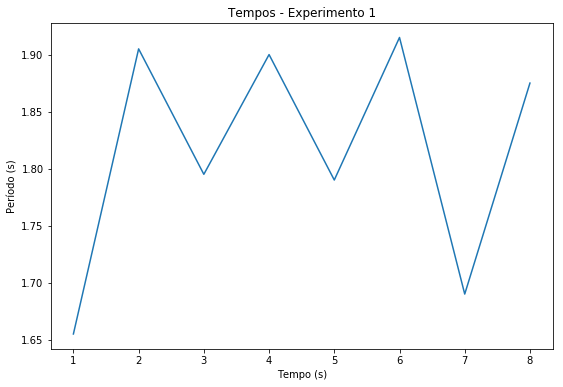

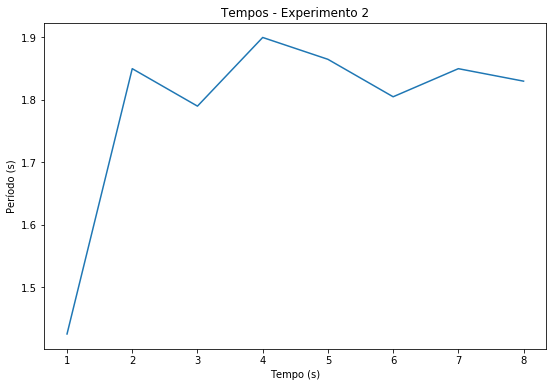

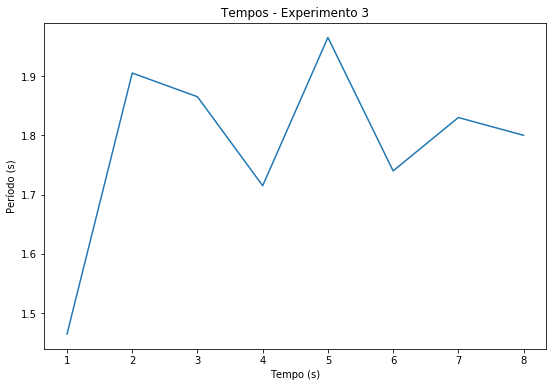

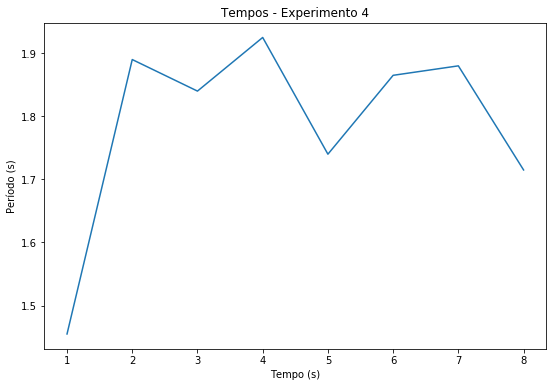

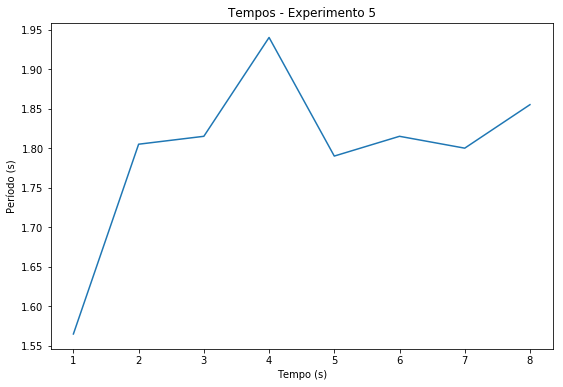

Esperado


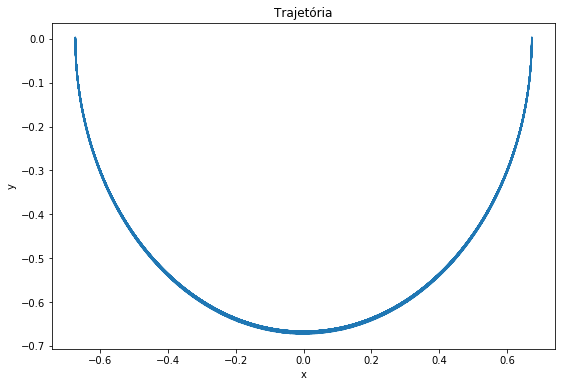

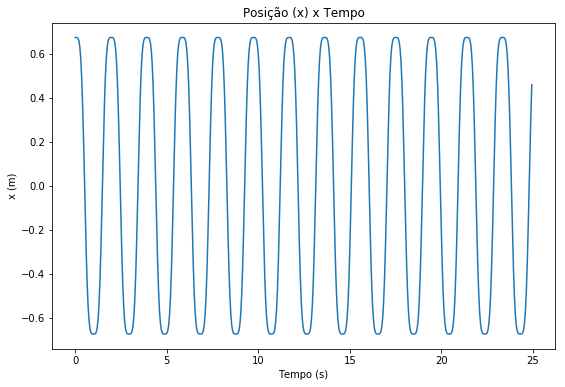

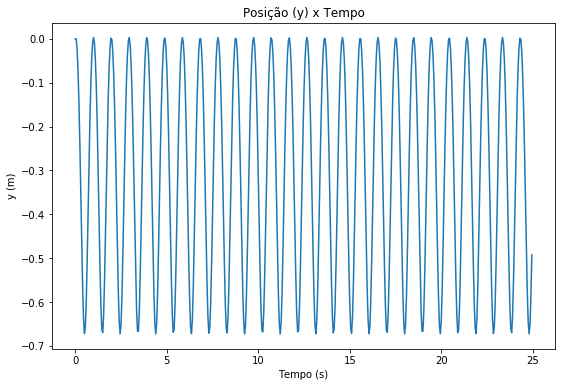

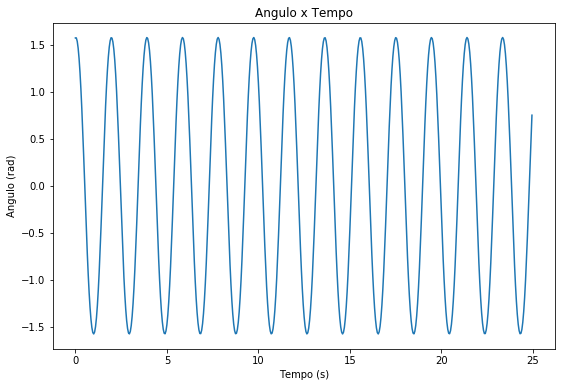

Período esperado: 1.647s
Período obtido (média dos experimentos): 1.795s
Erro: 0.149s


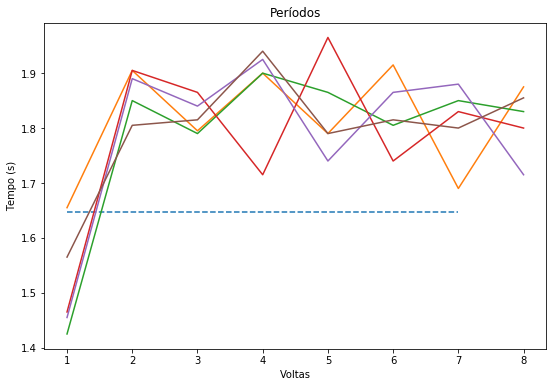

In [79]:
#theta = pi/2
#mLd²theta/dt² = -mgsintheta
#l = 0.673
#v = Ldtheta/dt
#a = Ld²theta/dt²

def initState(theta,dtheta,t):
    #S = np.array([y,v,a,t])
    S = [theta,dtheta,t]
    return(S)

def nextState(S,g,l,dt):
    #Sn = S + dt * rate(S)
    S[0] = S[0] + S[1]*dt
    S[1] = S[1] - (g/l)*math.sin(S[0])*dt
    S[2] = S[2] + dt
    return(S)

def rate(S):
    R = np.array([S[1], S[2], 1, 1])
    return(R)

thetas = []

def pendulo():
    
    data = pd.read_csv('pendulo_tempos.csv', sep=';', decimal='.')        
    data = data.as_matrix().transpose()

    media = 0.0
    per = [[0],[0]*8,[0]*8,[0]*8,[0]*8,[0]*8]
    i = 1
    ctr = 1
    while i < 10:
        pyplot.figure(0)
        pyplot.xlabel("Tempo (s)")
        pyplot.ylabel("Período (s)")
        pyplot.title("Tempos - Experimento {}".format(ctr))
        for j in range(8):
            per[ctr][j] = (data[i][j] + data[i+1][j])/2
            media += per[ctr][j]
        pyplot.plot([1,2,3,4,5,6,7,8],per[ctr])
        pyplot.show()
        i+=2
        ctr+=1
    
    media = media/40
    
    print("Esperado")
    
    l = 0.673
    g = 9.8
    theta = math.pi/2
    dtheta = 0
    t = 0.0
    dt = 0.05
    
    S = initState(theta,dtheta,t)
    posx = []
    posy = []
    tempo = []
    
    for i in range(500):
        posx.append(math.sin(S[0])*l)
        posy.append(-math.cos(S[0])*l)
        thetas.append(S[0])
        tempo.append(S[2])
        nextState(S,g,l, dt)
        
    pyplot.figure(0)
    pyplot.plot(posx, posy)
    pyplot.title("Trajetória")
    pyplot.xlabel("x")
    pyplot.ylabel("y")
    pyplot.show()
    
    pyplot.figure(0)
    pyplot.plot(tempo, posx)
    pyplot.title("Posição (x) x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("x (m)")
    pyplot.show()
    
    pyplot.figure(0)
    pyplot.plot(tempo, posy)
    pyplot.title("Posição (y) x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("y (m)")
    pyplot.show()
    
    pyplot.figure(0)
    pyplot.plot(tempo, thetas)
    pyplot.title("Angulo x Tempo")
    pyplot.xlabel("Tempo (s)")
    pyplot.ylabel("Angulo (rad)")
    pyplot.show()
    
    T = 2*math.pi*math.sqrt(l/g)
    print("Período esperado: %.3fs" %(T))
    print("Período obtido (média dos experimentos): %.3fs" %(media))
    print("Erro: %.3fs" %(abs(T-media)))

    
    pyplot.figure(0)
    pyplot.plot([1,2,3,4,5,6,7],[T]*7,linestyle='--')
    for i in range(1,6):
        pyplot.plot([1,2,3,4,5,6,7,8],per[i])
    pyplot.title("Períodos")
    pyplot.xlabel("Voltas")
    pyplot.ylabel("Tempo (s)")
    pyplot.show()
    
pendulo()

In [188]:

x = []
y = []
l = 0.673

for o in thetas:
    x.append(math.sin(o)*l)
    y.append(-math.cos(o)*l)

fig = pyplot.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.1, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text, period_text

def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]
        
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=50, blit=True, init_func=init)
pyplot.close()

In [189]:
HTML(anim.to_html5_video())

## Considerações Finais



## Log

O tempo que utilizamos para concluir esse exercício programa foi aproximadamente x horas, sendo:
<ul>
    <li>xh para a realização dos experimentos</li>
    <li>xh para a escrita do código</li>
    <li>xh para a escrita do relatório</li>
    <li>xh para a edição do vídeo</li>
</ul>

## Vídeo do experimento

(link aqui)

## Contribuições dos autores

Eduardo Nascimento foi responsável por (...)

Gabriel Massukado foi responsável por (...)

Larissa Goto foi responsável por (...)

Nathalia Borin foi responsável por (...)

Matheus Lima foi responsável por (...)

Todos os autores escreveram e revisaram esse artigo. Todos os autores leram e aprovaram a versão final desse artigo.